# IPython notebook for data analysis diss

## Imports:

In [230]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

import scipy

## Functions needed by two-way ANOVA:

In [231]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

## Function for conducting two-way ANOVA:

In [232]:
def two_way_anova(value, group1, group2):
    formula = value + ' ~ C(' + group1 + ') + C(' + group2 + ') + C(' + group1 + '):C(' + group2 + ')'
    model = ols(formula, data_all).fit()
    aov_table = anova_lm(model, typ=2)
    
    eta_squared(aov_table)
    omega_squared(aov_table)
    
    print(aov_table)
    
    res = model.resid 
    fig = sm.qqplot(res, line='s')

    plt.show()

## Function for conducting Independent-Samples t-Test

In [233]:
def independent_samples_t_test():
    zmf_Zeit = data_zmf.Zeit
    rest_Zeit = data_rest.Zeit
    zmf_Zeit_3 = data_zmf.Zeit_3
    rest_Zeit_3 = data_rest.Zeit_3
    
    twosample_results_Zeit = scipy.stats.ttest_ind(zmf_Zeit, rest_Zeit)
    twosample_results_Zeit_3 = scipy.stats.ttest_ind(zmf_Zeit_3, rest_Zeit_3)
    
    zmf_Score = data_zmf.Score
    rest_Score = data_rest.Score
    zmf_Score_3 = data_zmf.Score_3
    rest_Score_3 = data_rest.Score_3
    
    twosample_results_Score = scipy.stats.ttest_ind(zmf_Score, rest_Score)
    twosample_results_Score_3 = scipy.stats.ttest_ind(zmf_Score_3, rest_Score_3)
    
    print('p-Value Zeit (Mautner-Test):\tp-Value Zeit (Referenz-Test):\n'+str(twosample_results_Zeit.pvalue)+'\t                '+str(twosample_results_Zeit_3.pvalue))
    print('\np-Value Score (Mautner-Test):\tp-ValueScore (Referenz-Test):\n'+str(twosample_results_Score.pvalue)+'\t                '+str(twosample_results_Score_3.pvalue))

## Reading all necessary files

It is important for the analysis that the required datafiles are in the same directory and are prepared accordingly so that the notebook is able to retrieve the data.

In [234]:
all_players = "players.csv"
rest = "rest.csv"
zmf = "zmf.csv"

data_all = pd.read_csv(all_players)
data_zmf = pd.read_csv(zmf)
data_rest = pd.read_csv(rest)

## Result Independent Samples t-Test

This test examines the difference between the ZMF and the REST in both testings.

In [235]:
independent_samples_t_test()

p-Value Zeit (Mautner-Test):	p-Value Zeit (Referenz-Test):
0.028505617621	                0.00370422005448

p-Value Score (Mautner-Test):	p-ValueScore (Referenz-Test):
0.109043251992	                0.243081859625


## Result two-way ANOVA

This test examines the effect of age (divided into two groups: U15U16 and U18U19) and position (again divided into two groups: ZMF and REST) on Zeit and Score for two testings.

### Result when measured against Zeit (Mautner-Test)

                           sum_sq    df          F    PR(>F)    eta_sq  \
C(Position2)         1.880105e+05   1.0   8.574414  0.004482  0.075489   
C(Age)               5.426057e+05   1.0  24.746091  0.000004  0.217864   
C(Position2):C(Age)  7.158627e+04   1.0   3.264766  0.074690  0.028743   
Residual             1.688373e+06  77.0        NaN       NaN       NaN   

                     omega_sq  
C(Position2)         0.066103  
C(Age)               0.207235  
C(Position2):C(Age)  0.019765  
Residual                  NaN  


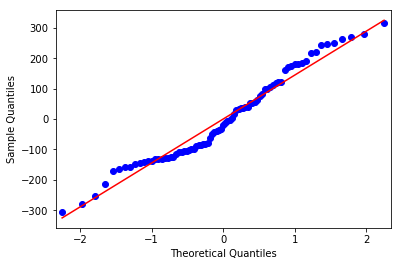

In [236]:
two_way_anova('Zeit', 'Position2', 'Age')

### Result when measured against Score (Mautner-Test)

                          sum_sq    df         F    PR(>F)    eta_sq  omega_sq
C(Position2)          194.188904   1.0  2.210619  0.141147  0.026148  0.014152
C(Age)                441.378555   1.0  5.024591  0.027870  0.059432  0.047047
C(Position2):C(Age)    27.060389   1.0  0.308052  0.580487  0.003644 -0.008089
Residual             6763.962606  77.0       NaN       NaN       NaN       NaN


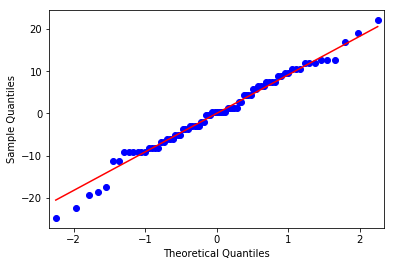

In [237]:
two_way_anova('Score', 'Position2', 'Age')

### Result when measured against Zeit (Referenz-Test)

                           sum_sq    df          F    PR(>F)    eta_sq  \
C(Position2)         3.625983e+05   1.0  13.478653  0.000443  0.119911   
C(Age)               5.607590e+05   1.0  20.844766  0.000019  0.185442   
C(Position2):C(Age)  2.912065e+04   1.0   1.082485  0.301398  0.009630   
Residual             2.071429e+06  77.0        NaN       NaN       NaN   

                     omega_sq  
C(Position2)         0.110035  
C(Age)               0.174989  
C(Position2):C(Age)  0.000727  
Residual                  NaN  


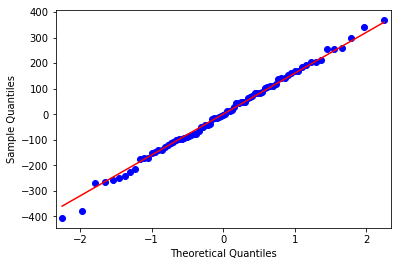

In [238]:
two_way_anova('Zeit_3', 'Position2', 'Age')

### Result when measured against Score (Referenz-Test)

                          sum_sq    df         F    PR(>F)    eta_sq  omega_sq
C(Position2)          148.294433   1.0  1.165485  0.283701  0.014209  0.001993
C(Age)                274.780666   1.0  2.159573  0.145758  0.026328  0.013966
C(Position2):C(Age)   216.463495   1.0  1.701243  0.196011  0.020740  0.008446
Residual             9797.358781  77.0       NaN       NaN       NaN       NaN


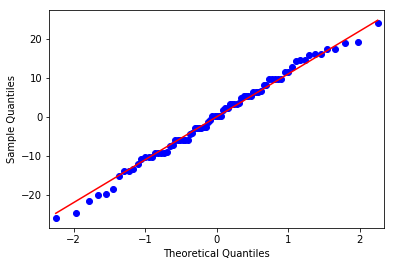

In [239]:
two_way_anova('Score_3', 'Position2', 'Age')